In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lons = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lons = zip(lats, lons)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
# Set Up City Data Frame

cities_df = pd.DataFrame({"City": cities})
cities_df

,City
0,lompoc
1,nouadhibou
2,ushuaia
3,saint-augustin
4,avarua
...,...
600,dossor
601,bima
602,kirakira
603,kuusamo


In [4]:
#Building OpenWeatehr url
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    'appid': weather_key,
    'units': 'imperial'
}

print('Beginning Data Retrieval')
print('----------------------------')

# Retrieve Data from OpenWeather
for index, row in cities_df.iterrows():
    
    city = row['City']
    
    params['q'] = city
    
    print(f"Processing Record {index} | {city}.")
    
    # assemble url and make API request
    response = requests.get(base_url, params=params)
    json_response = response.json()
    
    try:
        
        cities_df.loc[index, 'Cloudiness'] = json_response['clouds']['all']
        cities_df.loc[index, 'Country'] = json_response['sys']['country']
        cities_df.loc[index, 'Date'] = json_response['dt']
        cities_df.loc[index, 'Humidity'] = json_response['main']['humidity']
        cities_df.loc[index, 'Lat'] = json_response['coord']['lat']
        cities_df.loc[index, 'Lng'] = json_response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = json_response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = json_response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found... skipping.")

Beginning Data Retrieval
----------------------------
Processing Record 0 | lompoc.
Processing Record 1 | nouadhibou.
Processing Record 2 | ushuaia.
Processing Record 3 | saint-augustin.
Processing Record 4 | avarua.
Processing Record 5 | albany.
Processing Record 6 | punta arenas.
Processing Record 7 | cuamba.
Processing Record 8 | hobart.
Processing Record 9 | mananjary.
Processing Record 10 | pisco.
Processing Record 11 | qaanaaq.
Processing Record 12 | hun.
Processing Record 13 | chapleau.
Processing Record 14 | puerto ayora.
Processing Record 15 | hermanus.
Processing Record 16 | rikitea.
Processing Record 17 | upernavik.
Processing Record 18 | arraial do cabo.
Processing Record 19 | fortuna.
Processing Record 20 | bredasdorp.
Processing Record 21 | atuona.
Processing Record 22 | hilo.
Processing Record 23 | bethel.
Processing Record 24 | dikson.
Processing Record 25 | riberalta.
Processing Record 26 | kyabe.
Processing Record 27 | iqaluit.
Processing Record 28 | vaitupu.
City not

Processing Record 227 | lagoa.
Processing Record 228 | moose factory.
Processing Record 229 | vereya.
Processing Record 230 | waddan.
Processing Record 231 | aiquile.
Processing Record 232 | codrington.
Processing Record 233 | zheleznodorozhnyy.
Processing Record 234 | caucaia.
Processing Record 235 | zonguldak.
Processing Record 236 | chupa.
Processing Record 237 | vila velha.
Processing Record 238 | holland.
Processing Record 239 | yatou.
Processing Record 240 | cap malheureux.
Processing Record 241 | saint-philippe.
Processing Record 242 | laguna.
Processing Record 243 | sobolevo.
Processing Record 244 | eureka.
Processing Record 245 | zhanakorgan.
Processing Record 246 | sturgeon falls.
Processing Record 247 | pochutla.
Processing Record 248 | sarakhs.
Processing Record 249 | dunedin.
Processing Record 250 | pangody.
Processing Record 251 | kaka.
Processing Record 252 | airai.
Processing Record 253 | chumikan.
Processing Record 254 | teguldet.
Processing Record 255 | skalistyy.
Cit

Processing Record 449 | faanui.
Processing Record 450 | saposoa.
Processing Record 451 | rubtsovsk.
Processing Record 452 | novoagansk.
Processing Record 453 | avera.
Processing Record 454 | aquiraz.
Processing Record 455 | padang.
Processing Record 456 | yaan.
Processing Record 457 | havoysund.
Processing Record 458 | taburi.
City not found... skipping.
Processing Record 459 | puerto del rosario.
Processing Record 460 | bonavista.
Processing Record 461 | gbarnga.
Processing Record 462 | gazli.
Processing Record 463 | obzor.
Processing Record 464 | alanya.
Processing Record 465 | rosarito.
Processing Record 466 | kupang.
Processing Record 467 | nioro.
Processing Record 468 | karaul.
City not found... skipping.
Processing Record 469 | nalut.
Processing Record 470 | rong kwang.
Processing Record 471 | husavik.
Processing Record 472 | senno.
Processing Record 473 | kathu.
Processing Record 474 | gondanglegi.
Processing Record 475 | albion.
Processing Record 476 | tikapur.
Processing Recor

In [5]:
# Export data to csv file
cities_df.to_csv("../WeatherPy/cities.csv", header=True)

In [6]:
#Drop cities without data
cities_df = cities_df.dropna()
cities_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [7]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,90.0,US,1.583963e+09,77.0,34.64,-120.46,66.99,8.05
1,nouadhibou,2.0,MR,1.583963e+09,29.0,20.93,-17.03,77.00,9.17
2,ushuaia,90.0,AR,1.583963e+09,81.0,-54.80,-68.30,48.20,12.75
3,saint-augustin,100.0,CA,1.583963e+09,90.0,51.23,-58.65,16.83,17.54
4,avarua,46.0,CK,1.583963e+09,70.0,-21.21,-159.78,84.20,9.17


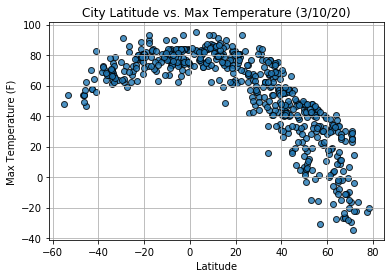

In [8]:
# Create a Scatter Plot for max temperature vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Max Temp']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (3/10/20)')
plt.grid()
plt.show()

The above code displays a scatterplot with data points that represent the max temperature and latitude of every city in the cities_df data frame on March 10, 2020. The scatterplot shows that max temperature for cities decreased the farther away that city is from the equator.

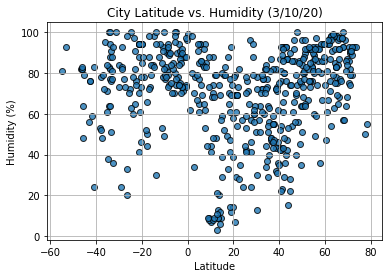

In [9]:
# Create a Scatter Plot for humidity vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Humidity']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/10/20)')
plt.grid()
plt.show()

The above code displays a scatterplot with data points that represent the humidity percentage and latitude of every city in the cities_df data frame at a certain time on March 10, 2020. The scatterplot shows that there does not appear to be much of a relationship between humidity and latitude.

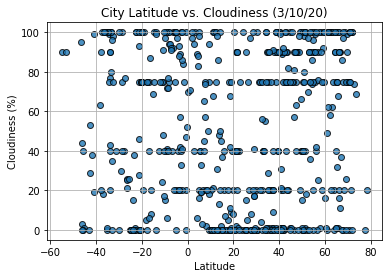

In [10]:
# Create a Scatter Plot for cloudiness vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Cloudiness']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/10/20)')
plt.grid()
plt.show()

The above code displays a scatterplot with data points that represent the cloudiness and latitude of every city in the cities_df data frame at a certain time on March 10, 2020. From the scatterplot, it is difficult to ascertain a relationship between cloudiness and latitude, but it does appear that cloudiness percentages tend to be in increments of 20.

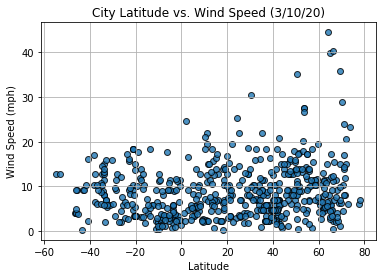

In [11]:
# Create a Scatter Plot for wind speed vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Wind Speed']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (3/10/20)')
plt.grid()
plt.show()

The above code displays a scatterplot with data points that represent the wind speed and latitude of every city in the cities_df data frame at a certain time on March 10, 2020. From the scatterplot, we can determine that wind speed appears to increase when a city's latitude increases past about 40 degrees.

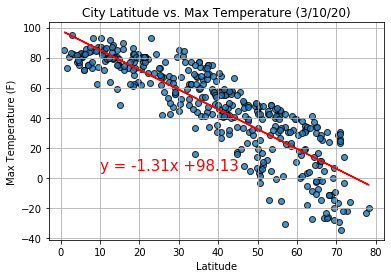

The r-squared is: -0.8587077568891116


In [27]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (3/10/20)')
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

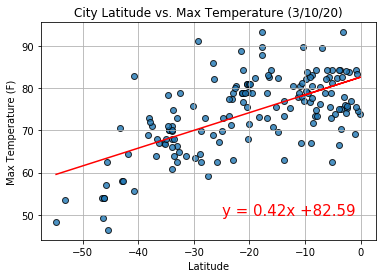

The r-squared is: 0.6317830445403009


In [28]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (3/10/20)')
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

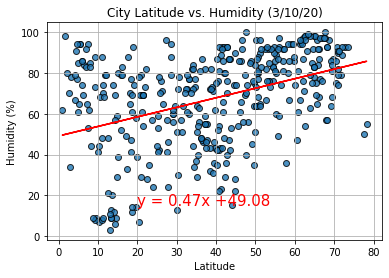

The r-squared is: 0.40133211792576584


In [14]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/10/20)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

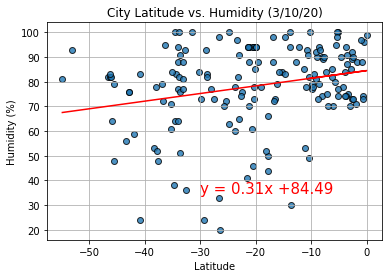

The r-squared is: 0.2486681787483097


In [31]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/10/20)')
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

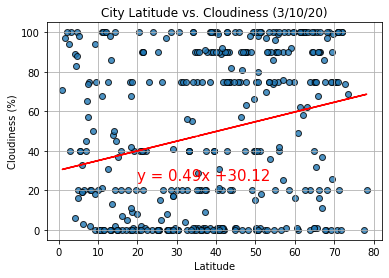

The r-squared is: 0.24735605723483983


In [32]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/10/20)')
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

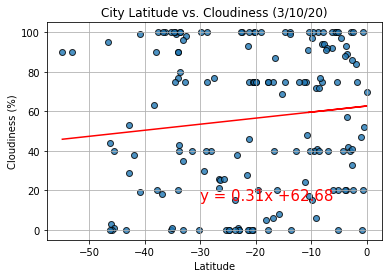

The r-squared is: 0.11316958755442182


In [24]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/10/20)')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

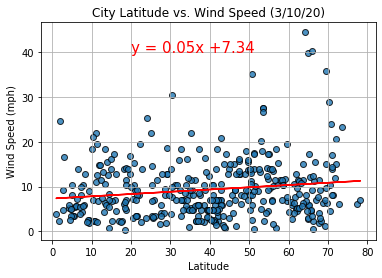

The r-squared is: 0.15323477684370793


In [22]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (3/10/20)')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

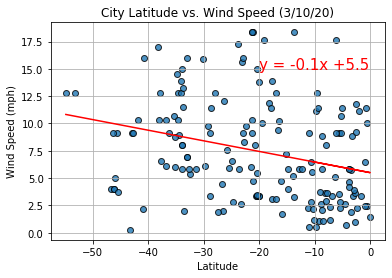

The r-squared is: -0.28298807703890444


In [21]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (3/10/20)')
plt.annotate(line_eq,(-20,15),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")